# Pymaceuticals Inc.
---

### Analysis

- Based on the Summary Statistics table, Ramicane has the most consistent results with a standard deviation of only 4.8, the lowest in the group. The Drug Regimen with the highest standard deviation is Ketapril indicating that its results are spread out making it the least consistent drug.
Based on our box plot of the four drugs (Capomulin, Ramicane, Infubinol, and Ceftamin), Ramicane resulted in the smallest tumor volume while Infubinol has the largest. 
Future analysis could be comparing the original tumor size to final tumor size based on drug regimen to see the effect of the drug on the rate of change of tumor size. 
 

In [351]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
full_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [352]:
# Checking the number of mice.
unique = full_data["Mouse ID"].unique()
len(unique)

249

In [353]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = full_data[full_data[['Mouse ID', 'Timepoint']].duplicated() == True]

dup_mouse_id = (dup_mouse['Mouse ID'].unique())

dup_mouse_id

array(['g989'], dtype=object)

In [354]:
# Optional: Get all the data for the duplicate mouse ID. 
only_g989 = full_data.loc[full_data["Mouse ID"] == "g989", :]
only_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [355]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = full_data[full_data['Mouse ID'] != "g989" ]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [356]:
# Checking the number of mice in the clean DataFrame.
unique = clean_df["Mouse ID"].unique()
len(unique)

248

## Summary Statistics

In [357]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
group_df = clean_df.groupby(['Drug Regimen'])
tumor_mean = group_df['Tumor Volume (mm3)'].mean()
tumor_median = group_df['Tumor Volume (mm3)']. median()
tumor_variance = group_df['Tumor Volume (mm3)'].var()
tumor_stand_dev = group_df['Tumor Volume (mm3)'].std()
tumor_sem = group_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stat_df = pd.merge(
                pd.merge(
                pd.merge(
                pd.merge(tumor_mean.rename('Mean Tumor Volume'), tumor_median.rename('Median Tumor Volume'), on= 'Drug Regimen'),
                tumor_variance.rename('Tumor Volume Variance'), on= 'Drug Regimen'),
                tumor_stand_dev.rename('Tumor Volume Std. Dev.'), on= 'Drug Regimen'),
                tumor_sem.rename('Tumor Volume Std. Err.'), on='Drug Regimen'      )
summary_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [358]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
tumer_vol_agg = group_df.aggregate({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']}) 
# Using the aggregation method, produce the same summary statistics in a single line
tumer_vol_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

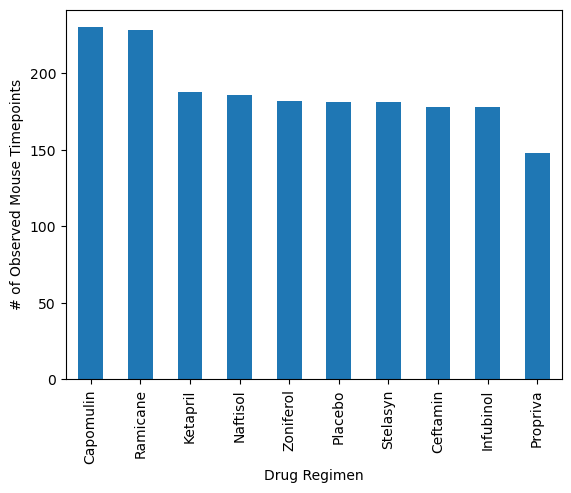

In [359]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_df = clean_df.groupby('Drug Regimen')

observed_timepoints= drug_df.Timepoint.count()

obs_time = observed_timepoints.sort_values(ascending=False)

observed_tp_chart = obs_time.plot(kind='bar')
observed_tp_chart.set_xlabel('Drug Regimen')
observed_tp_chart.set_ylabel('# of Observed Mouse Timepoints')
plt.show()

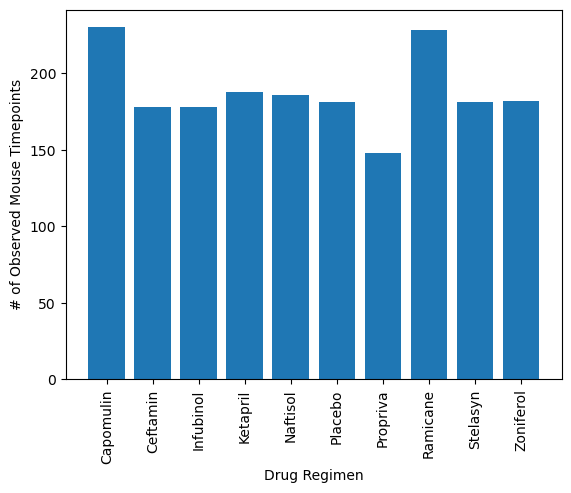

In [360]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_drug = clean_df.groupby(['Drug Regimen']).count()
pyplot_drug.reset_index(inplace=True)
x_axis = pyplot_drug['Drug Regimen']
y_axis = pyplot_drug['Timepoint']
plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()

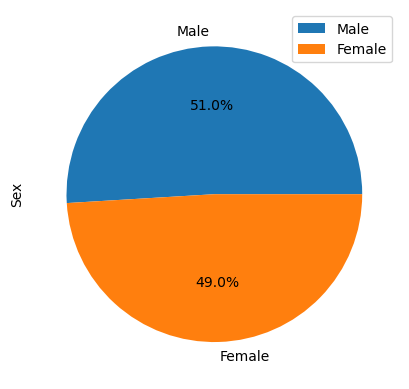

In [361]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
panda_plots = clean_df.Sex
female = panda_plots.str.count("Female").sum()
male = panda_plots.str.count("Male").sum()

panda_pie = pd.DataFrame({'Total': [male,female]}, index= ['Male', 'Female'])

panda_pie.plot(kind='pie', y='Total', autopct='%1.1f%%', ylabel='Sex')
plt.show()

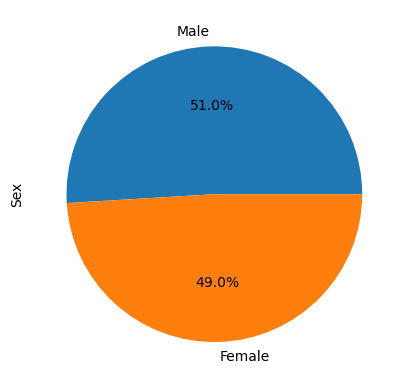

In [362]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plots = clean_df.Sex
female = pie_plots.str.count("Female").sum()
male = pie_plots.str.count("Male").sum()
gender = [male, female]
labels = ['Male', 'Female']

plt.pie(gender, labels= labels, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [363]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_v = clean_df.groupby(['Mouse ID'])['Timepoint'].max()

final_tumor_df = pd.DataFrame(final_tumor_v)
final_tumor_df.reset_index(inplace= True)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
full_final_tumor_df = final_tumor_df.merge(clean_df, on=('Mouse ID', 'Timepoint'), how='left')

In [364]:
full_final_tumor_df.head()   

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [365]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments:
    
    full_final_tumor_df.loc[full_final_tumor_df["Drug Regimen"] == x , "Tumor Volume (mm3)"]
    tumor_volume.append(full_final_tumor_df.loc[full_final_tumor_df["Drug Regimen"] == x , "Tumor Volume (mm3)"]) 
    
    # add subset 
    tumor_volume_df = pd.DataFrame(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    #quartiles = tumor_volume_df.quantile([.25, .5, .75])
    lowerq = tumor_volume_df.quantile([.25])
    upperq = tumor_volume_df.quantile([.75])
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    for x in treatments:
        print(f"{treatments}'s potential outliers: {lower_bound}")
        print(f"{treatments}'s potential outliers: {upper_bound}")



['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers:       19   24   61   64   66   80   83   85   87   108  ...  169  174  180  \
0.25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
0.75  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

      183  192  204  208  220  226  239  
0.25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
0.75  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2 rows x 25 columns]
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers:       19   24   61   64   66   80   83   85   87   108  ...  169  174  180  \
0.25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
0.75  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

      183  192  204  208  220  226  239  
0.25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
0.75  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2 rows x 25 columns]
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers:       19   24

C:\Users\tpuch\AppData\Local\Temp\ipykernel_33292\2122508951.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


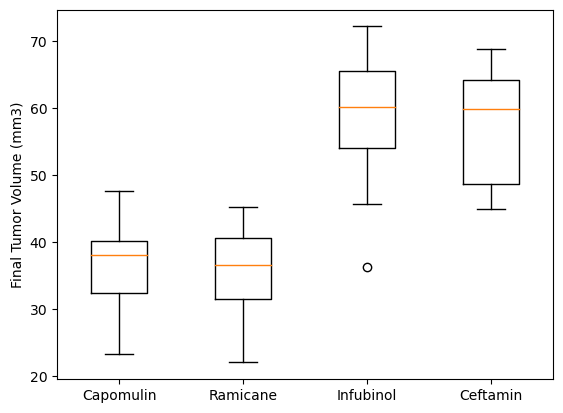

In [366]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_xticklabels(treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

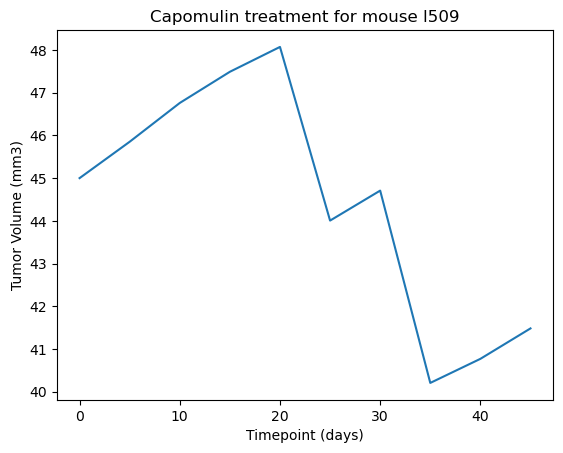

In [367]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
only_l509 = full_data.loc[full_data["Mouse ID"] == "l509", :]
plt.plot(only_l509['Timepoint'], only_l509['Tumor Volume (mm3)'])
plt.title('Capomulin treatment for mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show

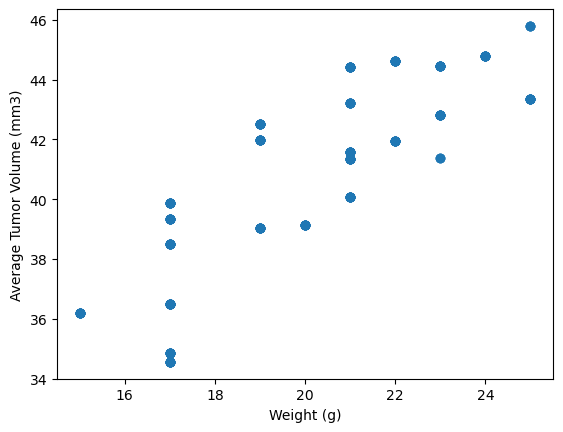

In [368]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
only_capomulin = pd.DataFrame(full_data.loc[full_data["Drug Regimen"] == "Capomulin", :])

avg_tumor_vol = pd.DataFrame(only_capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
avg_tumor_vol.reset_index(inplace=True)

scatter_data = avg_tumor_vol.merge(only_capomulin, on=('Mouse ID'), how='left') 
scatter_data2 = pd.DataFrame([scatter_data['Mouse ID'], scatter_data['Tumor Volume (mm3)_x'], scatter_data['Weight (g)']]).transpose()

scatter_data2.drop_duplicates(subset='Mouse ID')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(scatter_data2['Weight (g)'], scatter_data2['Tumor Volume (mm3)_x'])
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


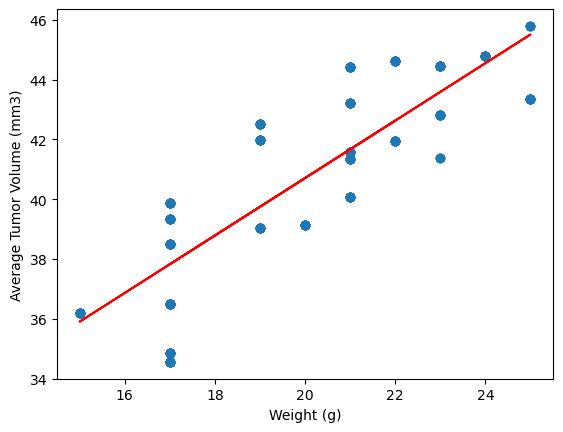

In [395]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = scatter_data2['Weight (g)'].astype(float)
y_values = scatter_data2['Tumor Volume (mm3)_x'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
res=st.linregress(x_values, y_values)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values, y_values)[0], 2)}")

plt.show()